# IMPORTING THE DEPENDENCIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import plot_importance,XGBClassifier
import lightgbm as lgb
import catboost as cb


# DATA COLLECTION & PREPROCESSING

In [6]:
# loading the Heart dataset
df=pd.read_csv("../dataset/diabetes.csv")

In [7]:
# Printing the first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Printing the last 5 rows of the dataset
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
# Statistical measures about the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# Checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# Checking the distribution of Outcome Variable
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [13]:
# it tells us for each value of outcome (0 or 1) what is the average
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Exploratory Data Analysis (EDA)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18952\3117247224.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


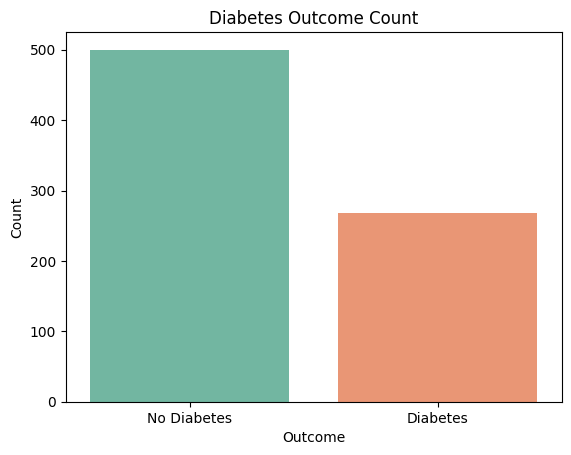

In [14]:
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title("Diabetes Outcome Count")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Diabetes", "Diabetes"])
plt.show()


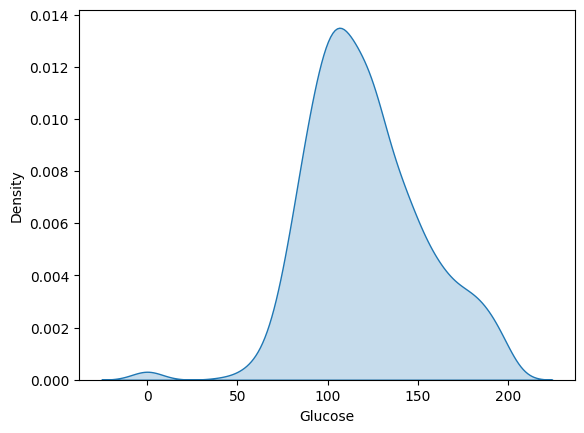

In [15]:
sns.kdeplot(df["Glucose"],fill = "fill")
plt.show()

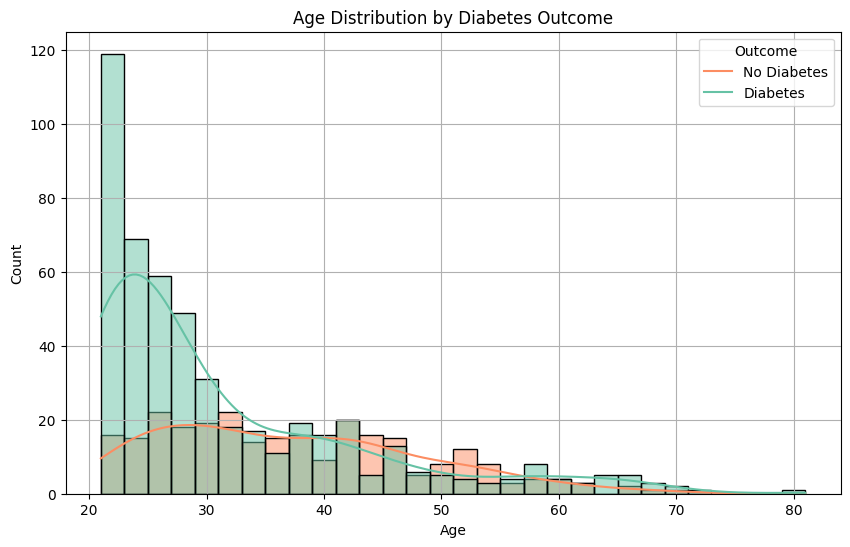

In [16]:
# Plotting age distribution by diabetes outcome
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Outcome', bins=30,kde=True,palette='Set2')

plt.title('Age Distribution by Diabetes Outcome')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.grid(True)
plt.show()


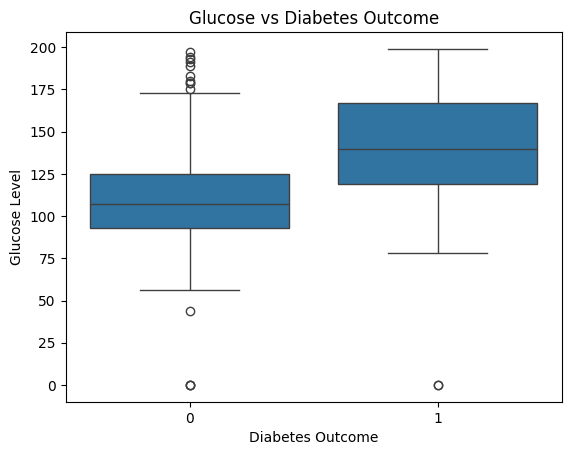

In [17]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose vs Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Glucose Level")
plt.show()

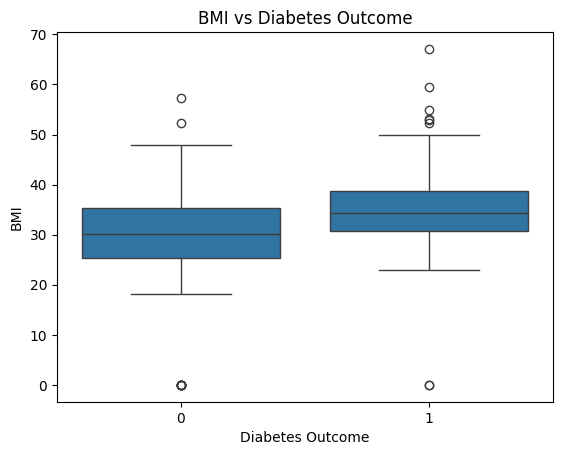

In [18]:
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title("BMI vs Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("BMI")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18952\3528835268.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Outcome', y='Insulin', palette='Set2')


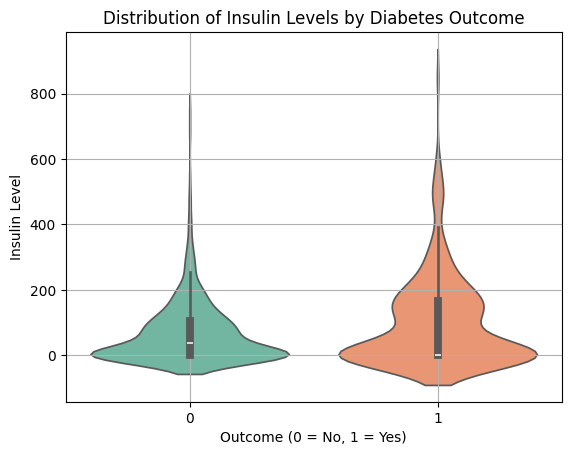

In [19]:
sns.violinplot(data=df, x='Outcome', y='Insulin', palette='Set2')
plt.title('Distribution of Insulin Levels by Diabetes Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Insulin Level')
plt.grid(True)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18952\2021914984.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Outcome', y='Pregnancies', palette='Set1')


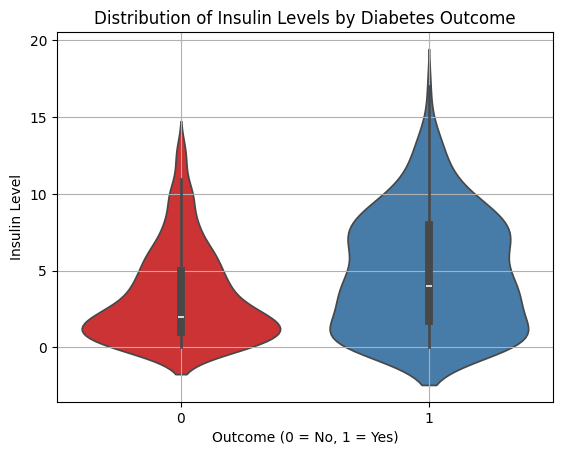

In [20]:
sns.violinplot(data=df, x='Outcome', y='Pregnancies', palette='Set1')
plt.title('Distribution of Insulin Levels by Diabetes Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Insulin Level')
plt.grid(True)
plt.show()

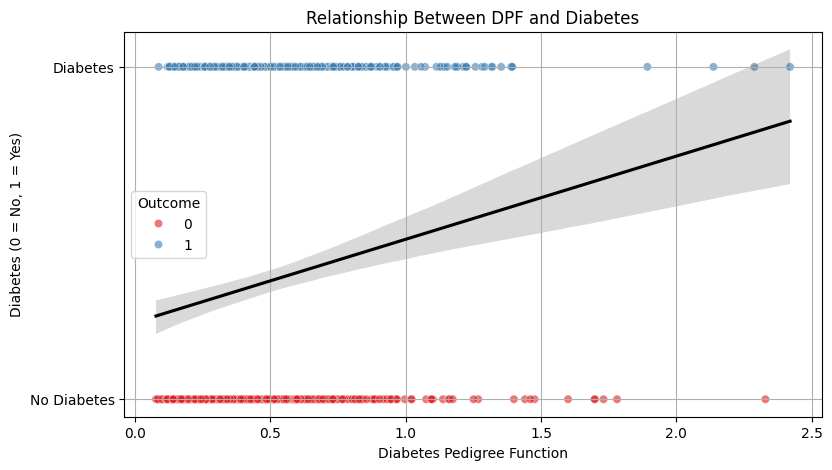

In [21]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='DiabetesPedigreeFunction', y='Outcome', hue='Outcome', palette='Set1', alpha=0.6)
sns.regplot(data=df, x='DiabetesPedigreeFunction', y='Outcome', scatter=False, color='black')

plt.title('Relationship Between DPF and Diabetes')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Diabetes (0 = No, 1 = Yes)')
plt.yticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.grid(True)
plt.show()


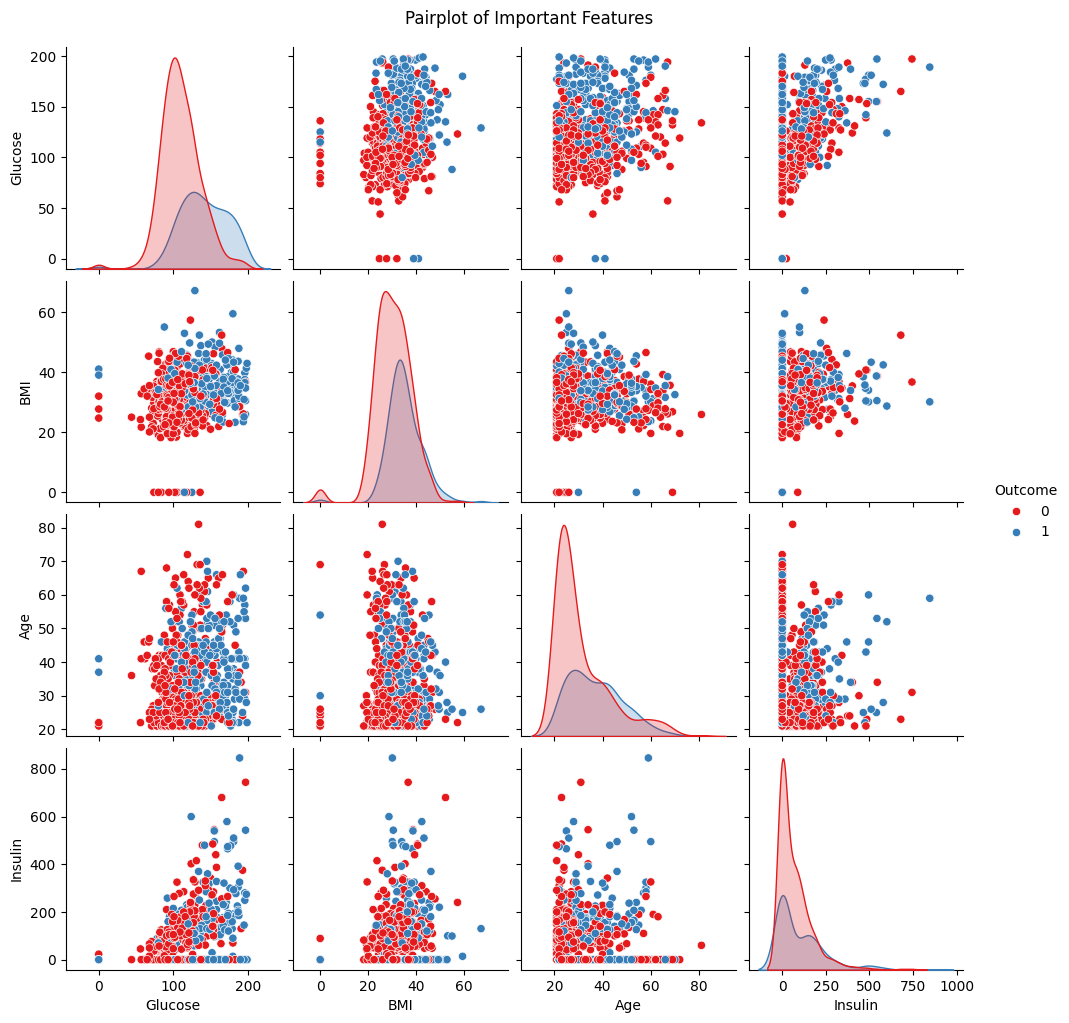

In [22]:
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']], hue='Outcome', palette='Set1')
plt.suptitle("Pairplot of Important Features", y=1.02)
plt.show()


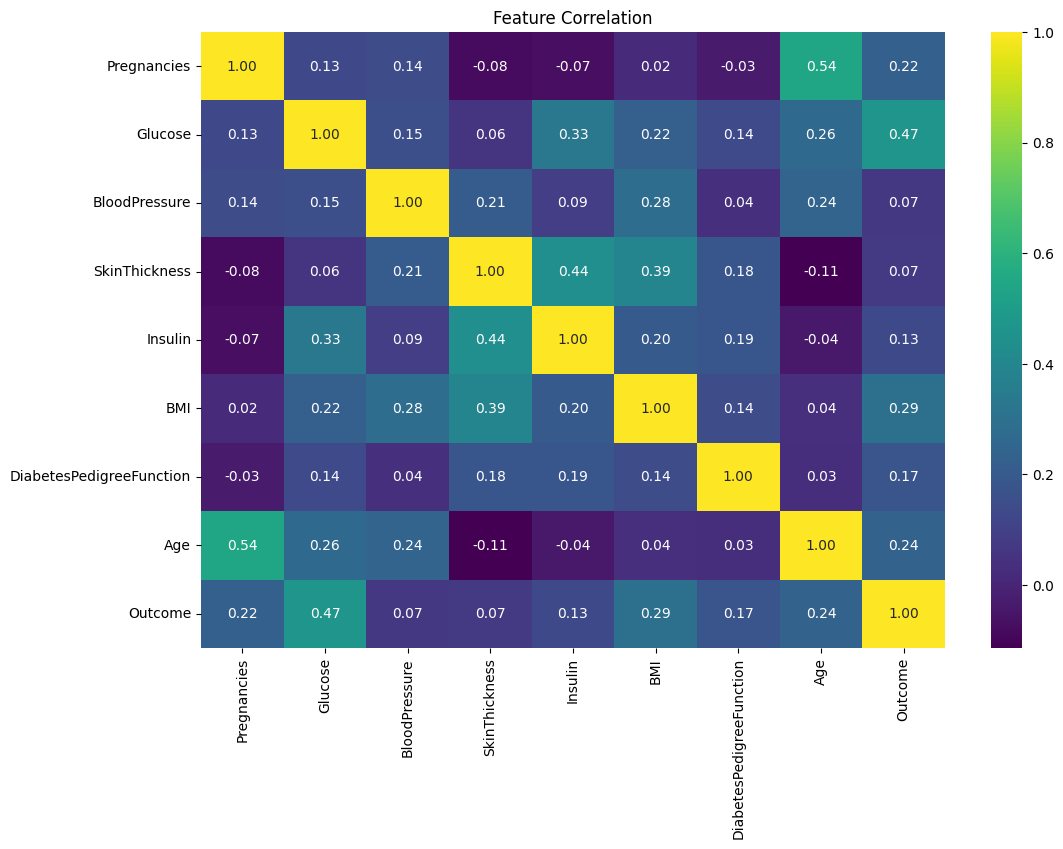

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="viridis")
plt.title("Feature Correlation")
plt.show()

In [24]:
#separating the data and label
X = df.drop(columns = 'Outcome', axis = 1)
Y = df['Outcome']

PERFORMING TRAIN TEST SPLIT

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [26]:
Y_train.count()

np.int64(614)

In [27]:
Y_train.value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [29]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100,random_state=42,max_depth=4),
    "SVM": SVC(kernel='linear'),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "CatBoost":cb.CatBoostClassifier(verbose=0),
    "LightGBM":lgb.LGBMClassifier(verbosity=-1)
}

# Train and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred)
    rec = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)

    # Print all metrics
    print(f"\nModel: {name}")
    print(f"Accuracy       : {acc:.2f}")
    print(f"Precision      : {prec:.2f}")
    print(f"Recall         : {rec:.2f}")
    print(f"F1 Score       : {f1:.2f}")
    print(f"Confusion Matrix:\n{cm}")


Model: Logistic Regression
Accuracy       : 0.71
Precision      : 0.61
Recall         : 0.52
F1 Score       : 0.56
Confusion Matrix:
[[82 18]
 [26 28]]

Model: Random Forest
Accuracy       : 0.72
Precision      : 0.63
Recall         : 0.48
F1 Score       : 0.55
Confusion Matrix:
[[85 15]
 [28 26]]

Model: SVM
Accuracy       : 0.72
Precision      : 0.62
Recall         : 0.52
F1 Score       : 0.57
Confusion Matrix:
[[83 17]
 [26 28]]

Model: XGBoost
Accuracy       : 0.73
Precision      : 0.62
Recall         : 0.61
F1 Score       : 0.62
Confusion Matrix:
[[80 20]
 [21 33]]

Model: CatBoost
Accuracy       : 0.75
Precision      : 0.65
Recall         : 0.59
F1 Score       : 0.62
Confusion Matrix:
[[83 17]
 [22 32]]

Model: LightGBM
Accuracy       : 0.75
Precision      : 0.65
Recall         : 0.59
F1 Score       : 0.62
Confusion Matrix:
[[83 17]
 [22 32]]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18952\1004915138.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')


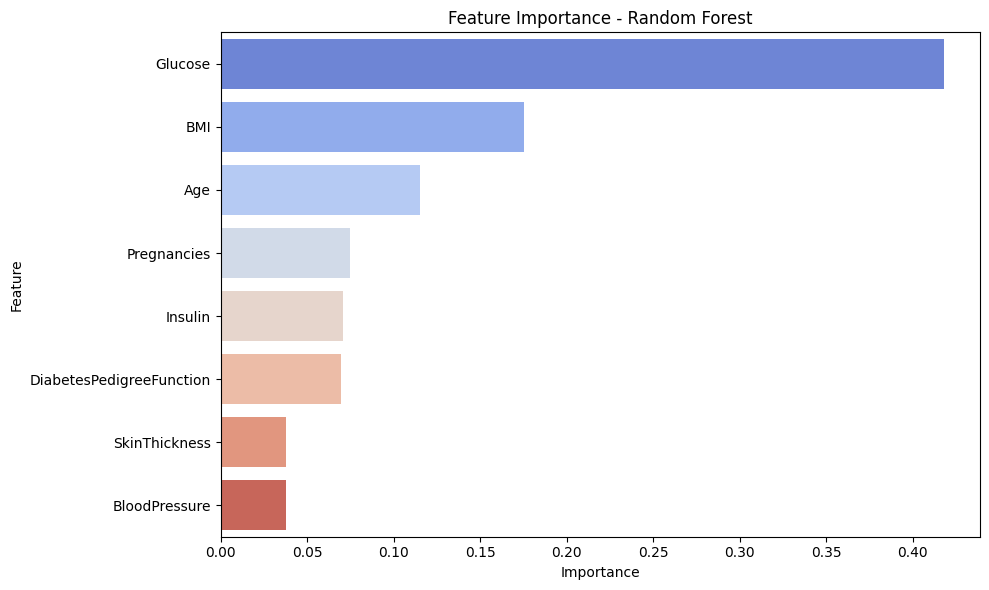

In [30]:
rf=RandomForestClassifier(n_estimators=100,random_state=42,max_depth=4)
rf.fit(X_train,Y_train)
importances = rf.feature_importances_
features = df.drop('Outcome', axis=1).columns  # exclude outcome column

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': features,'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [31]:
Catboost=cb.CatBoostClassifier(verbose=0)
Catboost.fit(X_train,Y_train)

# Making a Predictive System

In [32]:
input_data = (1,93,70,31,0,30.4,0.315,23)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction =Catboost.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[0]
The person is not diabetic


### CatBoost is selected for its superior handling of categorical data and strong performance on small to medium imbalanced datasets.  
### It requires minimal preprocessing and delivers stable, high recall and F1 scores, making it ideal for diabetes prediction.


In [33]:
import joblib

In [34]:
fileName_Diabetes = "../saved_models/diabetes.joblib"

In [35]:
joblib.dump(Catboost,fileName_Diabetes)

['../saved_models/diabetes.joblib']

In [36]:
loaded_diabetes_model = joblib.load(fileName_Diabetes)

In [37]:
input_data = (1,126,60,0,0,30.1,0.349,47)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction =loaded_diabetes_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic
